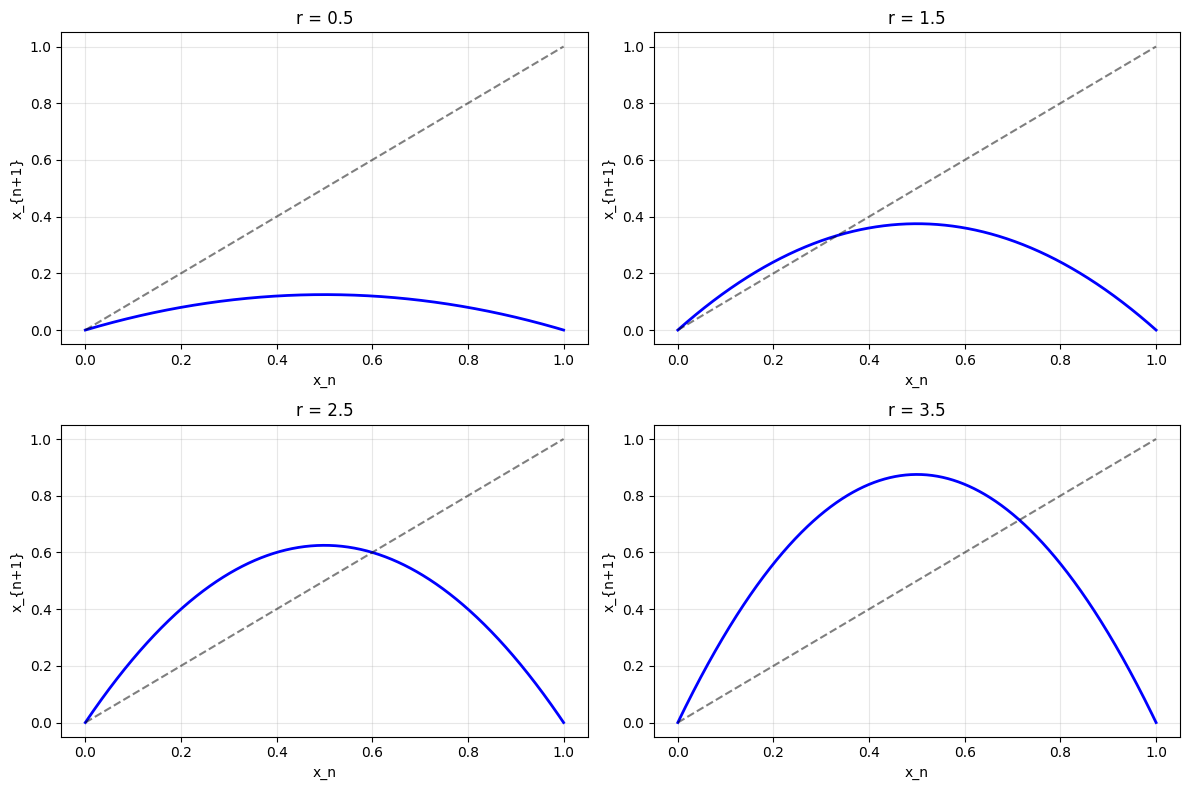

In [4]:

"""EASY"""

"""Графики логистического отображения"""
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1 - x)

x = np.linspace(0, 1, 1000)
r_values = [0.5, 1.5, 2.5, 3.5]

plt.figure(figsize=(12, 8))
for i, r in enumerate(r_values):
    y = logistic_map(x, r)
    plt.subplot(2, 2, i+1)
    plt.plot(x, y, 'b-', linewidth=2)
    plt.plot(x, x, 'k--', alpha=0.5)
    plt.title(f'r = {r}')
    plt.xlabel('x_n')
    plt.ylabel('x_{n+1}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

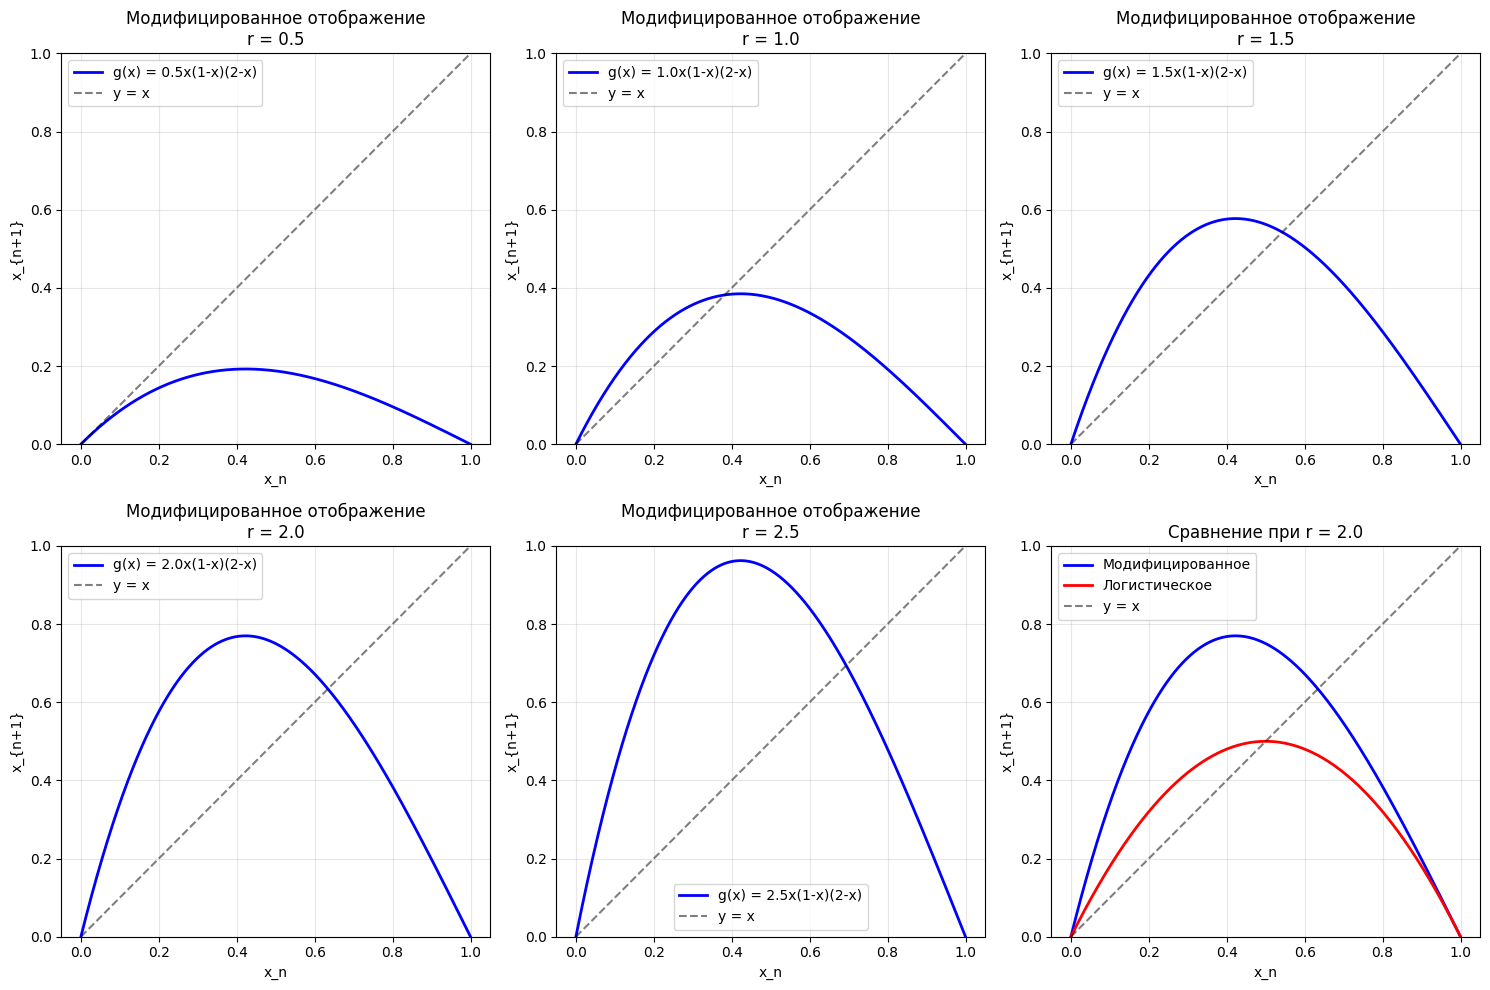

In [3]:

"""EASY"""

"""Графики модификационного отображаения"""
import numpy as np
import matplotlib.pyplot as plt

def modified_map(x, r):
    """g(x) = rx(1-x)(2-x) для варианта N=4"""
    return r * x * (1 - x) * (2 - x)

x = np.linspace(0, 1, 1000)
r_values = [0.5, 1.0, 1.5, 2.0, 2.5]

plt.figure(figsize=(15, 10))

for i, r in enumerate(r_values):
    y = modified_map(x, r)
    plt.subplot(2, 3, i+1)
    plt.plot(x, y, 'b-', linewidth=2, label=f'g(x) = {r}x(1-x)(2-x)')
    plt.plot(x, x, 'k--', alpha=0.5, label='y = x')
    plt.title(f'Модифицированное отображение\nr = {r}')
    plt.xlabel('x_n')
    plt.ylabel('x_{n+1}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1)

plt.subplot(2, 3, 6)
r_compare = 2.0
y_modified = modified_map(x, r_compare)
y_logistic = r_compare * x * (1 - x)

plt.plot(x, y_modified, 'b-', linewidth=2, label='Модифицированное')
plt.plot(x, y_logistic, 'r-', linewidth=2, label='Логистическое')
plt.plot(x, x, 'k--', alpha=0.5, label='y = x')
plt.title(f'Сравнение при r = {r_compare}')
plt.xlabel('x_n')
plt.ylabel('x_{n+1}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

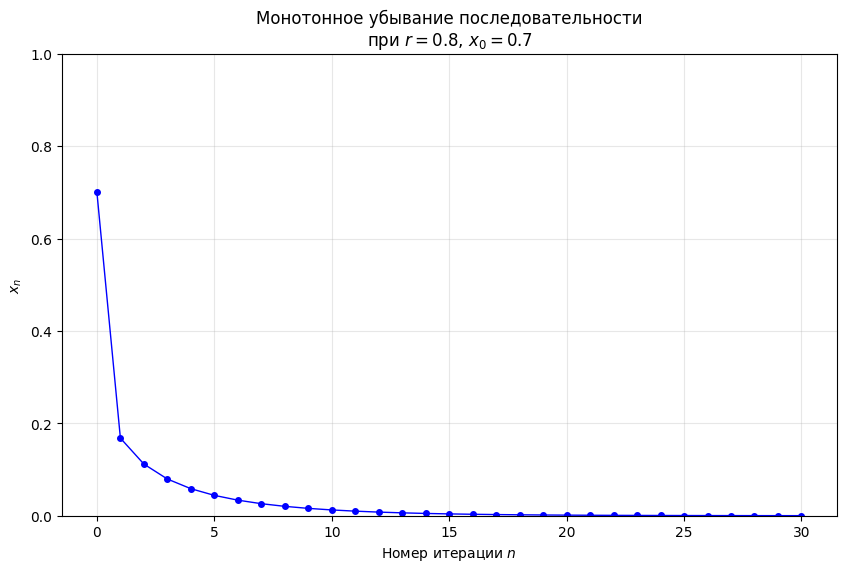

In [5]:

"""NORMAL"""

"""Монотонное убывание при r ∈ (0;1]"""

import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1 - x)

n_iter = 30
r = 0.8
x0 = 0.7

x_vals = [x0]
for i in range(n_iter):
    x_vals.append(logistic_map(x_vals[-1], r))

plt.figure(figsize=(10, 6))
plt.plot(x_vals, 'bo-', markersize=4, linewidth=1)
plt.title(f'Монотонное убывание последовательности\nпри $r = {r}$, $x_0 = {x0}$')
plt.xlabel('Номер итерации $n$')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.show()

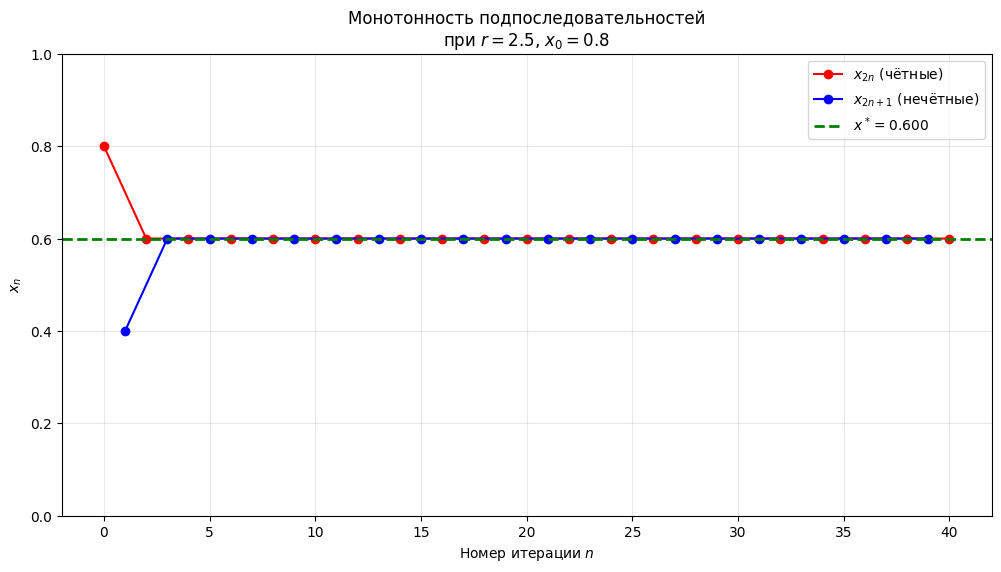

x_{2n} монотонно убывает: False
x_{2n+1} монотонно возрастает: False


In [6]:

"""NORMAL"""

"""Подпоследовательности при r ∈ (2;3)"""

r = 2.5
x_star = 1 - 1/r
x0 = 0.8
n_iter = 40

x_vals = [x0]
for i in range(n_iter):
    x_vals.append(logistic_map(x_vals[-1], r))

even_n = list(range(0, len(x_vals), 2))
odd_n = list(range(1, len(x_vals), 2))

plt.figure(figsize=(12, 6))
plt.plot(even_n, [x_vals[i] for i in even_n], 'ro-', 
         label='$x_{2n}$ (чётные)', markersize=6, linewidth=1.5)
plt.plot(odd_n, [x_vals[i] for i in odd_n], 'bo-', 
         label='$x_{2n+1}$ (нечётные)', markersize=6, linewidth=1.5)
plt.axhline(y=x_star, color='green', linestyle='--', 
           label=f'$x^* = {x_star:.3f}$', linewidth=2)
plt.title(f'Монотонность подпоследовательностей\nпри $r = {r}$, $x_0 = {x0}$')
plt.xlabel('Номер итерации $n$')
plt.ylabel('$x_n$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.show()

print(f"x_{{2n}} монотонно убывает: {all(x_vals[even_n[i]] > x_vals[even_n[i+1]] for i in range(len(even_n)-1))}")
print(f"x_{{2n+1}} монотонно возрастает: {all(x_vals[odd_n[i]] < x_vals[odd_n[i+1]] for i in range(len(odd_n)-1))}")

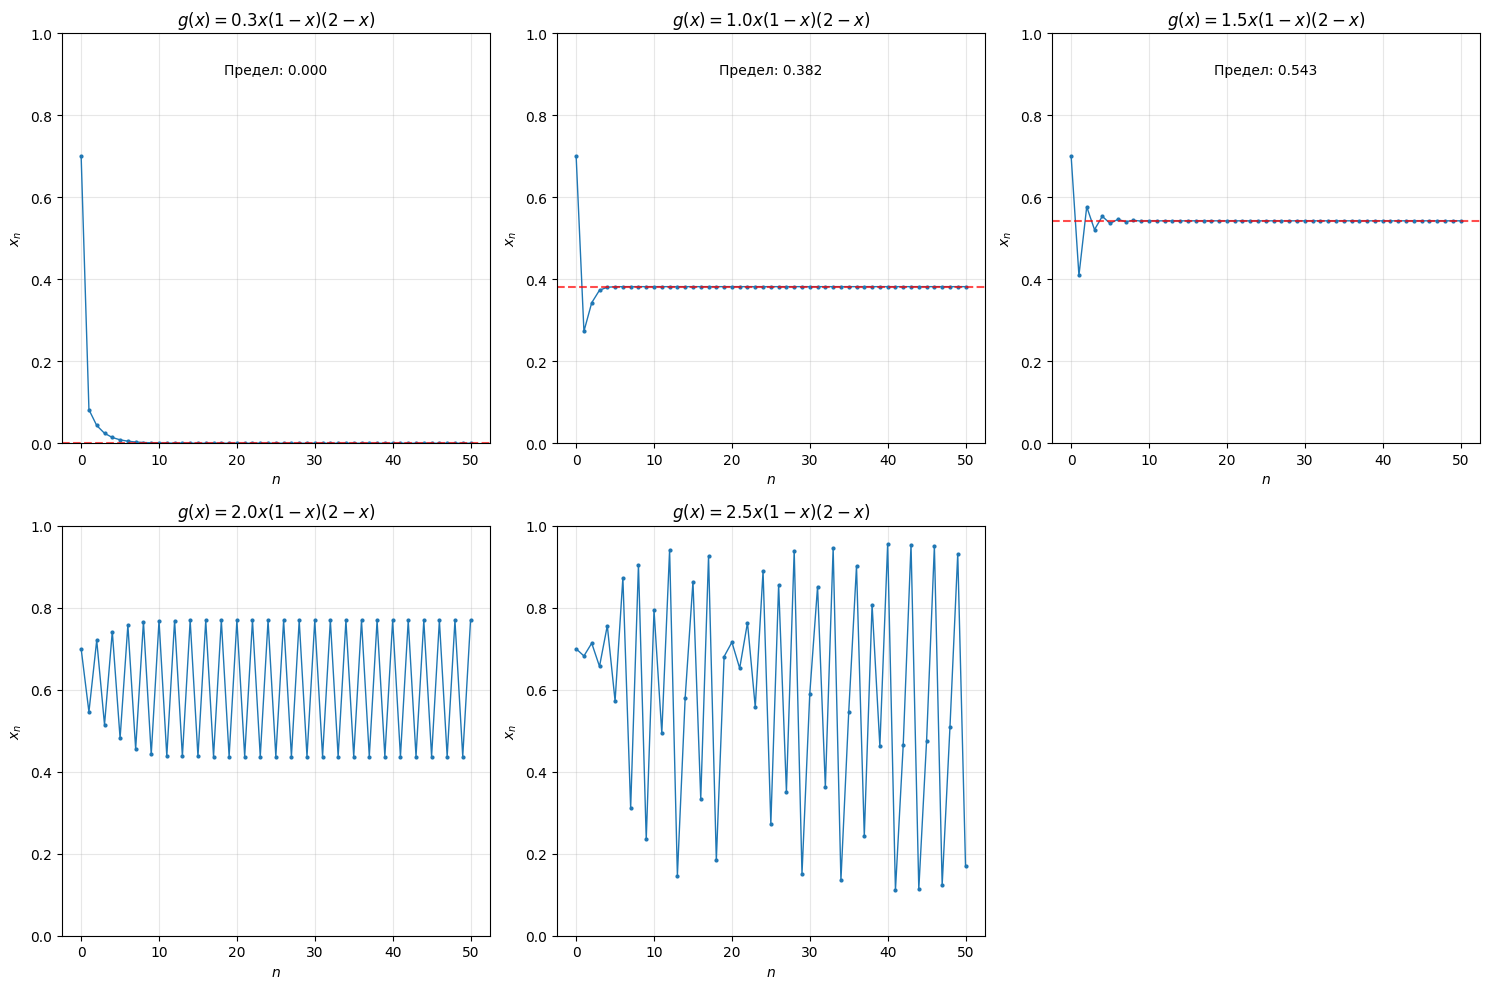

In [7]:

"""NORMAL"""

"""Временные ряды для модифицированного отображения"""

def modified_map(x, r):
    return r * x * (1 - x) * (2 - x)

r_values = [0.3, 1.0, 1.5, 2.0, 2.5]
n_iter = 50
x0 = 0.7

plt.figure(figsize=(15, 10))

for i, r in enumerate(r_values):
    x_vals = [x0]
    for j in range(n_iter):
        x_vals.append(modified_map(x_vals[-1], r))
    
    plt.subplot(2, 3, i+1)
    plt.plot(x_vals, 'o-', markersize=2, linewidth=1)
    plt.title(f'$g(x) = {r}x(1-x)(2-x)$')
    plt.xlabel('$n$')
    plt.ylabel('$x_n$')
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1)
    
    last_10 = x_vals[-10:]
    if max(last_10) - min(last_10) < 0.01:
        limit = np.mean(last_10)
        plt.axhline(y=limit, color='red', linestyle='--', alpha=0.7)
        plt.text(0.5, 0.9, f'Предел: {limit:.3f}', 
                transform=plt.gca().transAxes, ha='center')

plt.tight_layout()
plt.show()

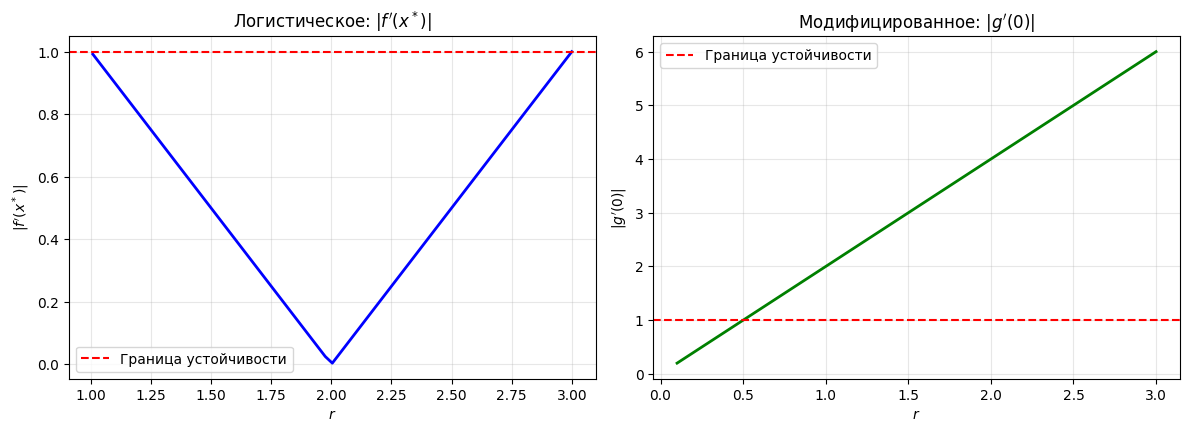

Анализ устойчивости:
Логистическое: x* = 0 устойчиво при |f'(0)| = r < 1
Модифицированное: x* = 0 устойчиво при |g'(0)| = 2r < 1 ⇒ r < 0.5


In [9]:

"""NORMAL"""

"""Сравнение производных в неподвижных точках"""
def derivative_logistic(x, r):
    return r * (1 - 2*x)

def derivative_modified(x, r):
    return r * ((1-x)*(2-x) - x*(2-x) - x*(1-x))

r_range = np.linspace(0.1, 3, 100)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
x_star_logistic = 1 - 1/r_range[r_range > 1]
deriv_logistic = derivative_logistic(x_star_logistic, r_range[r_range > 1])
plt.plot(r_range[r_range > 1], np.abs(deriv_logistic), 'b-', linewidth=2)
plt.axhline(y=1, color='red', linestyle='--', label='Граница устойчивости')
plt.title('Логистическое: $|f\'(x^*)|$')
plt.xlabel('$r$')
plt.ylabel('$|f\'(x^*)|$')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 2)
deriv_modified_zero = derivative_modified(0, r_range)
plt.plot(r_range, np.abs(deriv_modified_zero), 'g-', linewidth=2)
plt.axhline(y=1, color='red', linestyle='--', label='Граница устойчивости')
plt.title('Модифицированное: $|g\'(0)|$')
plt.xlabel('$r$')
plt.ylabel('$|g\'(0)|$')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("Анализ устойчивости:")
print("Логистическое: x* = 0 устойчиво при |f'(0)| = r < 1")
print("Модифицированное: x* = 0 устойчиво при |g'(0)| = 2r < 1 ⇒ r < 0.5")

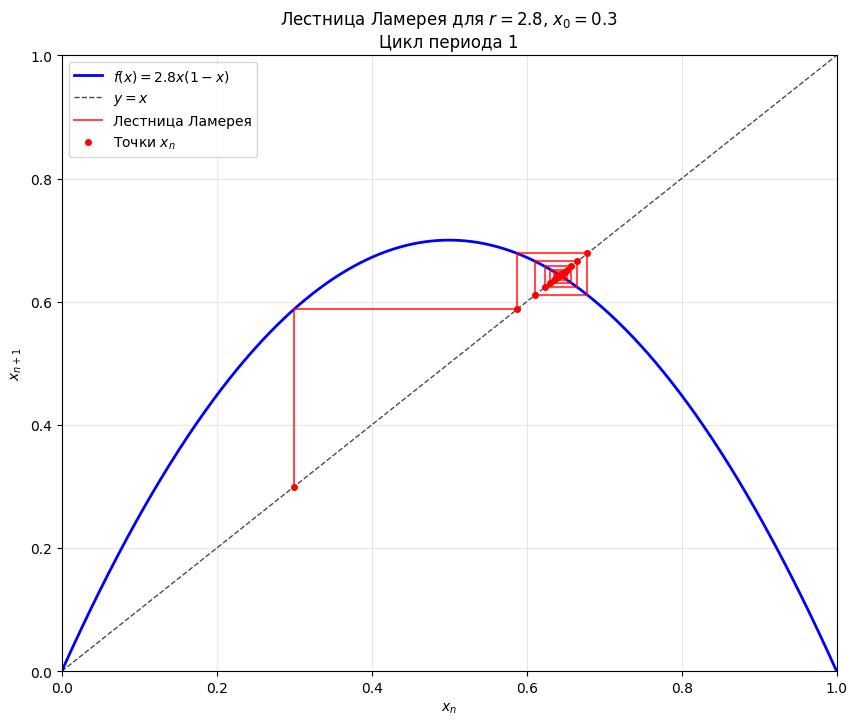

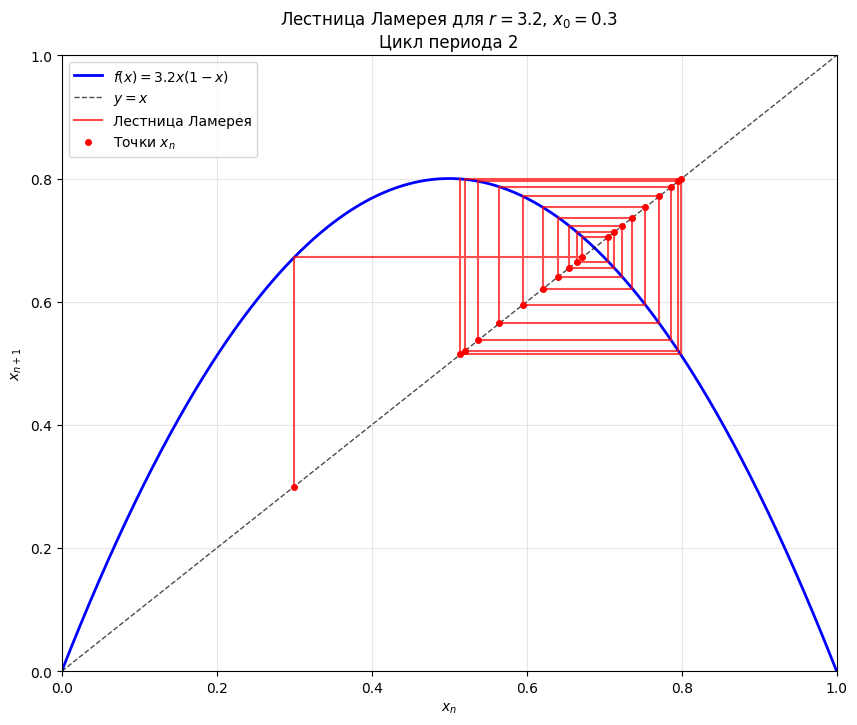

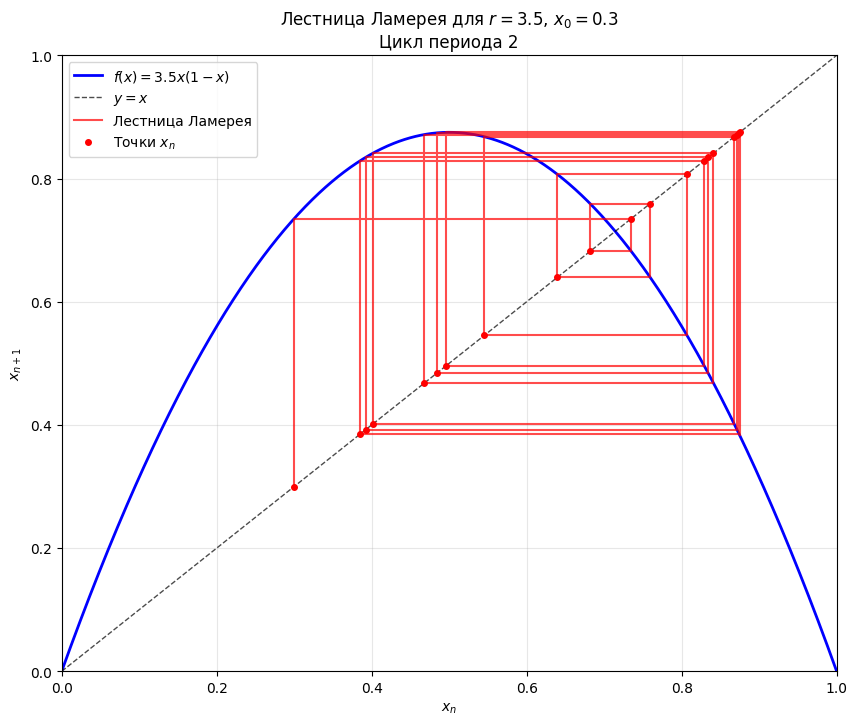

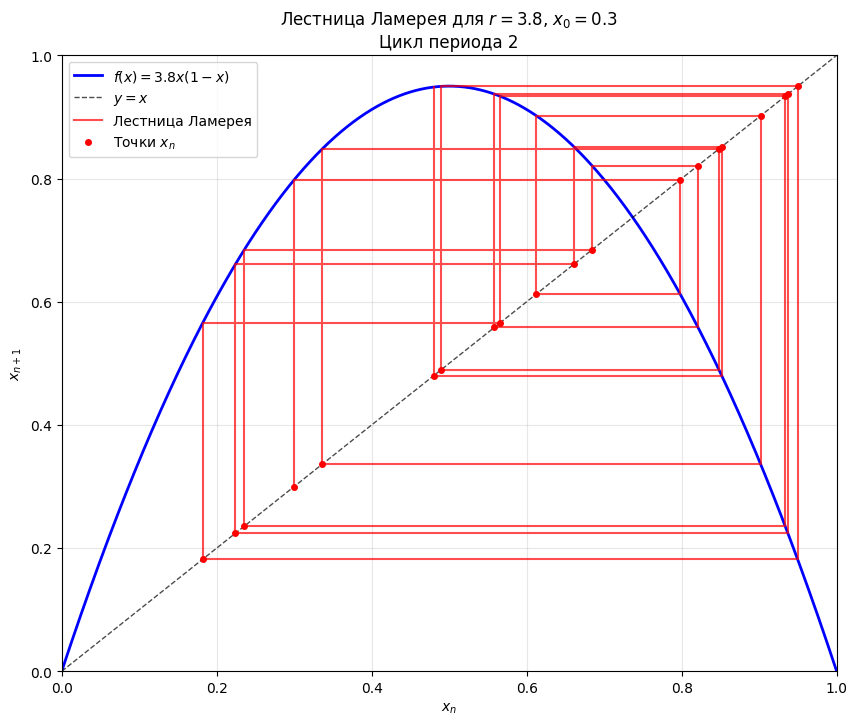

In [2]:

"""HARD"""

import numpy as np
import matplotlib.pyplot as plt

def plot_lameyre_staircase(r, x0, n_iter=50, title=None):
    """
    Построение лестницы Ламерея для логистического отображения
    """
    def f(x):
        return r * x * (1 - x)

    x_vals = [x0]
    for i in range(n_iter):
        x_vals.append(f(x_vals[-1]))

    x_plot = []
    y_plot = []
    
    for i in range(n_iter):
        x_plot.extend([x_vals[i], x_vals[i]])
        y_plot.extend([x_vals[i], x_vals[i+1]])

        if i < n_iter - 1:
            x_plot.extend([x_vals[i], x_vals[i+1]])
            y_plot.extend([x_vals[i+1], x_vals[i+1]])

    x_line = np.linspace(0, 1, 1000)
    y_line = f(x_line)
    
    plt.figure(figsize=(10, 8))

    plt.plot(x_line, y_line, 'b-', linewidth=2, label=f'$f(x) = {r}x(1-x)$')
    plt.plot(x_line, x_line, 'k--', linewidth=1, alpha=0.7, label='$y = x$')

    plt.plot(x_plot, y_plot, 'r-', linewidth=1.5, alpha=0.7, label='Лестница Ламерея')
    plt.plot(x_vals[:-1], x_vals[:-1], 'ro', markersize=4, label='Точки $x_n$')
    
    plt.title(f'Лестница Ламерея для $r = {r}$, $x_0 = {x0}$' + (f'\n{title}' if title else ''))
    plt.xlabel('$x_n$')
    plt.ylabel('$x_{n+1}$')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()
    
    return x_vals

r_values = [2.8, 3.2, 3.5, 3.8]
x0 = 0.3

for r in r_values:
    plot_lameyre_staircase(r, x0, n_iter=20, 
                          title=f"Цикл периода {2 if r > 3 else 1}")

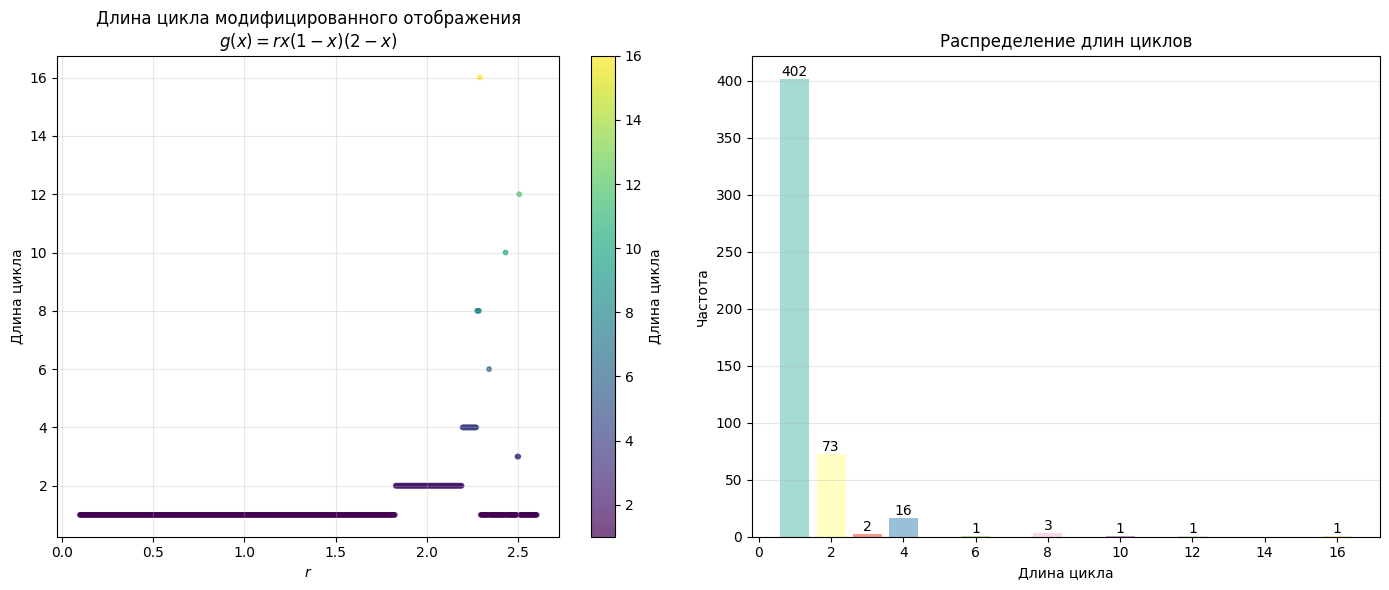

Анализ бифуркационных точек:
Бифуркация при r ≈ 1.828: период 1 → 2
Бифуркация при r ≈ 2.194: период 2 → 4
Бифуркация при r ≈ 2.274: период 4 → 8
Бифуркация при r ≈ 2.289: период 8 → 16
Бифуркация при r ≈ 2.294: период 16 → 1
Бифуркация при r ≈ 2.339: период 1 → 6
Бифуркация при r ≈ 2.344: период 6 → 1
Бифуркация при r ≈ 2.430: период 1 → 10
Бифуркация при r ≈ 2.435: период 10 → 1
Бифуркация при r ≈ 2.495: период 1 → 3
Бифуркация при r ≈ 2.505: период 3 → 12
Бифуркация при r ≈ 2.510: период 12 → 1


In [4]:

"""HARD"""

import numpy as np
import matplotlib.pyplot as plt

def g_modified(x, r):
    """Модифицированное отображение для варианта N=4"""
    if x < 0 or x > 1:
        return 0
    return r * x * (1 - x) * (2 - x)

def analyze_cycles_modified_safe(r_max=2.6, steps=500):
    """
    Безопасный анализ изменения длины цикла для модифицированного отображения
    """
    r_values = np.linspace(0.1, r_max, steps)
    periods = []
    
    for r in r_values:
        x = 0.3

        for _ in range(200):
            x = g_modified(x, r)

        history = []
        for _ in range(100):
            x = g_modified(x, r)
            history.append(x)

        period_found = 1
        for p in range(1, min(21, len(history))):
            is_periodic = True
            for i in range(p):
                idx1 = -1 - i
                idx2 = -1 - i - p
                if idx2 >= -len(history):
                    diff = abs(history[idx1] - history[idx2])
                    if diff > 1e-4:
                        is_periodic = False
                        break
            
            if is_periodic:
                period_found = p
                break
        

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(r_values, periods, c=periods, cmap='viridis', s=10, alpha=0.7)
    plt.title('Длина цикла модифицированного отображения\n$g(x) = rx(1-x)(2-x)$')
    plt.xlabel('$r$')
    plt.ylabel('Длина цикла')
    plt.colorbar(label='Длина цикла')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    unique_periods = np.unique(periods)
    counts = [periods.count(p) for p in unique_periods]
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_periods)))
    bars = plt.bar(unique_periods, counts, color=colors, alpha=0.8)

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{count}', ha='center', va='bottom')
    
    plt.title('Распределение длин циклов')
    plt.xlabel('Длина цикла')
    plt.ylabel('Частота')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Анализ бифуркаций
    print("Анализ бифуркационных точек:")
    for i in range(1, len(r_values)-1):
        if periods[i] != periods[i-1]:
            print(f"Бифуркация при r ≈ {r_values[i]:.3f}: период {periods[i-1]} → {periods[i]}")
    
    return r_values, periods

# Запускаем анализ
r_vals, periods = analyze_cycles_modified_safe()

<>:29: SyntaxWarning: invalid escape sequence '\i'
<>:29: SyntaxWarning: invalid escape sequence '\i'
/var/folders/ck/1kxslz353pqbrqg40ql7q91c0000gn/T/ipykernel_47760/2128301849.py:29: SyntaxWarning: invalid escape sequence '\i'
  label=f'$r_{{\infty}} = 3.5699456$', alpha=0.7)


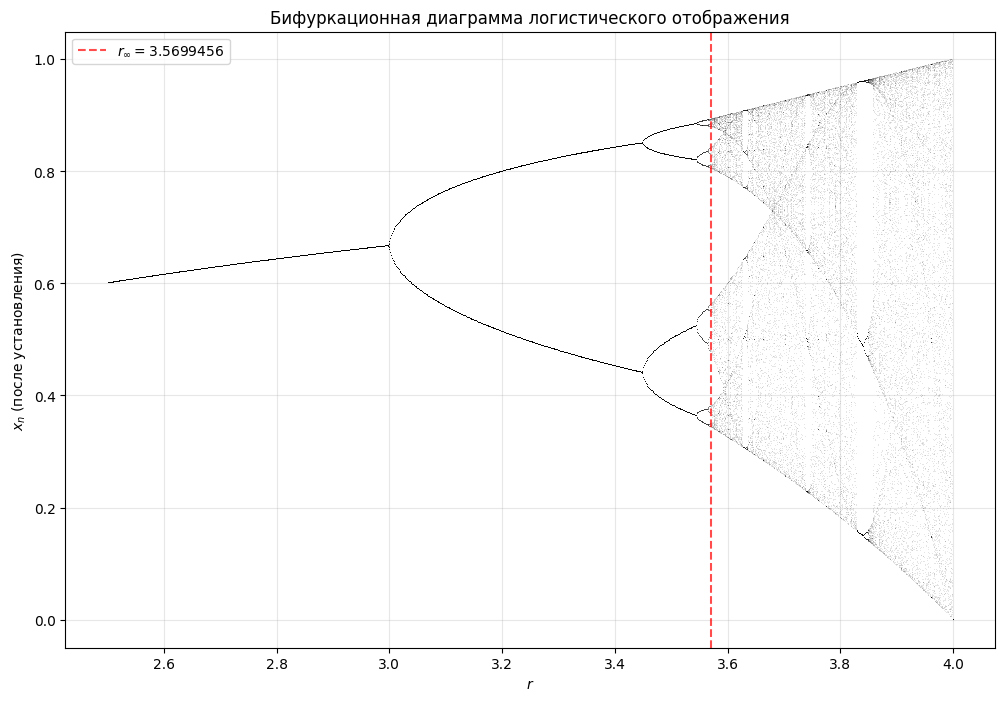

/var/folders/ck/1kxslz353pqbrqg40ql7q91c0000gn/T/ipykernel_47760/2128301849.py:42: RuntimeWarning: overflow encountered in scalar multiply
  return r * x * (1 - x) * (2 - x)


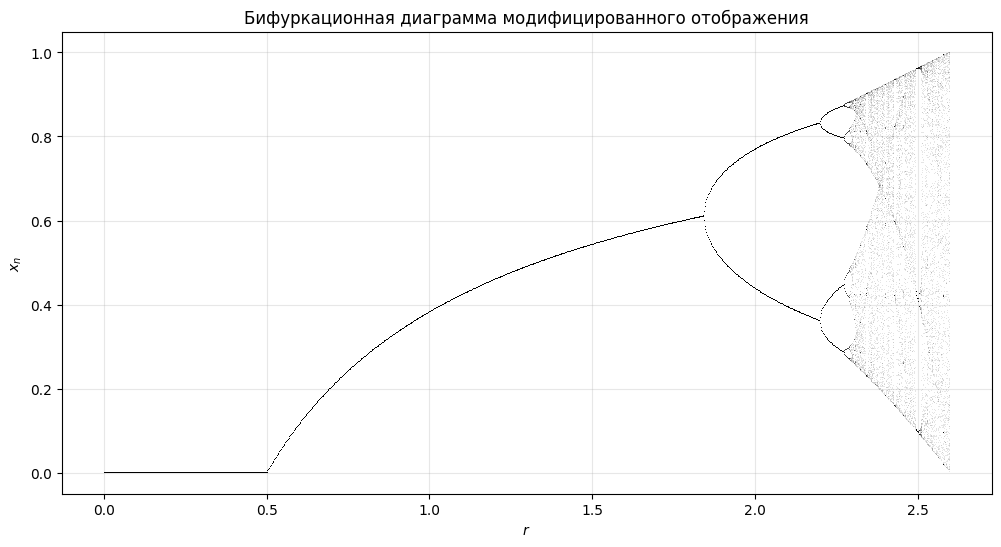

In [5]:
def plot_bifurcation_diagram(r_min=0, r_max=4, steps=1000, trans=1000, iter=100, x0=0.5):
    """
    Построение бифуркационной диаграммы для логистического отображения
    """
    r_values = np.linspace(r_min, r_max, steps)
    x_vals = []
    r_vals = []
    
    for r in r_values:
        x = x0
        # Транзиентные итерации
        for _ in range(trans):
            x = r * x * (1 - x)
        # Сбор данных после установления
        for _ in range(iter):
            x = r * x * (1 - x)
            x_vals.append(x)
            r_vals.append(r)
    
    plt.figure(figsize=(12, 8))
    plt.plot(r_vals, x_vals, ',k', alpha=0.1, markersize=0.1)
    plt.title('Бифуркационная диаграмма логистического отображения')
    plt.xlabel('$r$')
    plt.ylabel('$x_n$ (после установления)')
    plt.grid(True, alpha=0.3)
    
    # Отметка r_infinity
    plt.axvline(x=3.5699456, color='red', linestyle='--', 
                label=f'$r_{{\infty}} = 3.5699456$', alpha=0.7)
    
    plt.legend()
    plt.show()

# Построение бифуркационной диаграммы
plot_bifurcation_diagram(r_min=2.5, r_max=4)

def plot_modified_bifurcation(r_max=2.6):
    """
    Бифуркационная диаграмма для модифицированного отображения
    """
    def g(x, r):
        return r * x * (1 - x) * (2 - x)
    
    r_values = np.linspace(0, r_max, 1000)
    x_vals = []
    r_vals = []
    
    for r in r_values:
        x = 0.5
        for _ in range(1000):
            x = g(x, r)
        for _ in range(100):
            x = g(x, r)
            x_vals.append(x)
            r_vals.append(r)
    
    plt.figure(figsize=(12, 6))
    plt.plot(r_vals, x_vals, ',k', alpha=0.1, markersize=0.1)
    plt.title('Бифуркационная диаграмма модифицированного отображения')
    plt.xlabel('$r$')
    plt.ylabel('$x_n$')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_modified_bifurcation()